In [2]:
import pandas as pd

# !**Loading Data**!

In [4]:
all_athlete_games = pd.read_csv("C:/Users/timis/DataspellProjects/PrinciplesOfDataScience/Practice/Data/Olympics Data/all_athlete_games.csv")
all_regions = pd.read_csv("C:/Users/timis/DataspellProjects/PrinciplesOfDataScience/Practice/Data/Olympics Data/all_regions.csv")

# **!Exploring the Data!**

Displaying the first five rows

In [5]:
all_regions.head()
all_athlete_games.head() #Displaying first five rows

,Entry ID,Name,Gender,Age,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,Male,24.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,1,A Lamusi,Male,23.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,2,Gunnar Nielsen Aaby,Male,24.0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,3,Edgar Lindenau Aabye,Male,34.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,"Cornelia ""Cor"" Aalten (-Strannood)",Female,18.0,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


Displaying the last five rows

In [6]:
all_athlete_games.tail()
all_regions.tail()

,NOC,Region
229,YEM,Yemen
230,YMD,Yemen
231,YUG,Serbia
232,ZAM,Zambia
233,ZIM,Zimbabwe


In [8]:
all_athlete_games.dtypes #Getting the Datatypes

Entry ID      int64
Name         object
Gender       object
Age         float64
Team         object
NOC          object
Year          int64
Season       object
City         object
Sport        object
Event        object
Medal        object
dtype: object

In [9]:
all_athlete_games.shape #How many (Rows, Columns)

(286237, 12)

In [10]:
all_athlete_games.columns # Display all the column names

Index(['Entry ID', 'Name', 'Gender', 'Age', 'Team', 'NOC', 'Year', 'Season',
       'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

# **!Data Cleaning!**

In [15]:
mv_all_athlete_games = all_athlete_games.isnull().sum()
print(mv_all_athlete_games) # Count and check for missing values in dataframe

Entry ID         0
Name             0
Gender           0
Age           9474
Team             0
NOC              0
Year             0
Season           0
City             0
Sport            0
Event            0
Medal       244005
dtype: int64


In [16]:
all_athlete_games.drop_duplicates() #Drop duplicates, if (inplace = True) the original dataset will be modified

,Entry ID,Name,Gender,Age,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,Male,24.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,1,A Lamusi,Male,23.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,2,Gunnar Nielsen Aaby,Male,24.0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,3,Edgar Lindenau Aabye,Male,34.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,"Cornelia ""Cor"" Aalten (-Strannood)",Female,18.0,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
286232,271111,Andrzej ya,Male,29.0,Poland-1,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
286233,271112,Piotr ya,Male,27.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
286234,271113,Piotr ya,Male,27.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
286235,271114,Tomasz Ireneusz ya,Male,30.0,Poland,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


# Create a new column with the Age group
* `bins = []` to Define the age groups and their labels
* `labels = []` to ass labels to the group 
* `pd.cut(data, bins, labels, include_lowest)` to modify the data and add it to the original dataframe

In [17]:
bins = [0, 20, 30, 40, 100]
labels = ["under 20", "20-30", "30-40", "40+"]
all_athlete_games["age_group"] = pd.cut(all_athlete_games["Age"], bins = bins, labels=labels, include_lowest = True)
all_athlete_games

,Entry ID,Name,Gender,Age,Team,NOC,Year,Season,City,Sport,Event,Medal,age_group
0,0,A Dijiang,Male,24.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,20-30
1,1,A Lamusi,Male,23.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,20-30
2,2,Gunnar Nielsen Aaby,Male,24.0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,20-30
3,3,Edgar Lindenau Aabye,Male,34.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,30-40
4,26,"Cornelia ""Cor"" Aalten (-Strannood)",Female,18.0,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,under 20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
286232,271111,Andrzej ya,Male,29.0,Poland-1,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,20-30
286233,271112,Piotr ya,Male,27.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,20-30
286234,271113,Piotr ya,Male,27.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,20-30
286235,271114,Tomasz Ireneusz ya,Male,30.0,Poland,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,20-30


# Merge `all_athlete_games` and `all_regions` on a common column
* Find common columns with `set` and `intersect` methods
* convert common columns to a list to be used in the `pd.merge` function
* Merge the datasets based on the columns using `pd.merge(data1, data2, on = desired_columns)`

In [20]:
# Find the common columns
common_columns = set(all_athlete_games.columns).intersection(set(all_regions.columns)) 
# Convert common columns to a List 
common_columns_list = list(common_columns)
# Merge the two dataframes with pd.merge
merged_df = pd.merge(all_athlete_games, all_regions, on = common_columns_list) 
print(merged_df)

        Entry ID                   Name  Gender   Age     Team  NOC  Year  \
0              0              A Dijiang    Male  24.0    China  CHN  1992   
1              1               A Lamusi    Male  23.0    China  CHN  2012   
2           1072          Abudoureheman    Male  22.0    China  CHN  2000   
3           2611              Ai Linuer    Male  25.0    China  CHN  2004   
4           2612              Ai Yanhan  Female  14.0    China  CHN  2016   
...          ...                    ...     ...   ...      ...  ...   ...   
286232      3312      DOUEIHY Gabriella  Female  22.0  Lebanon  LBN  2020   
286233      3560            ELIAS Nacif    Male  32.0  Lebanon  LBN  2020   
286234      3776  FATTOUH Mahassen Hala  Female  31.0  Lebanon  LBN  2020   
286235      4884       HADID Noureddine    Male  28.0  Lebanon  LBN  2020   
286236      6116    KABBARA Munzer Mark    Male  18.0  Lebanon  LBN  2020   

        Season            City          Sport  \
0       Summer       Barce

# **!Data Analysis!**

**Get athletes with the most medals**
1. Filter out athletes that dont have medals by using the `.notnull()` function on the `"Medals` column in the `all_athlete_games` dataframe
2. Use `.groupby()` to group the athletes by `"Name" and "Medal"`
3. Use `.count` to count the amount of medals
4. ise `.idxmax()` to find the athlete with the highest amount

In [22]:
# Filter to only get athletes with medals
medal_winners = all_athlete_games[all_athlete_games["Medal"].notnull()]
# Group the filtered dataframe by the athletes amount of medals
athlete_medal_count = medal_winners.groupby("Name")["Medal"].count()
#Find the athlete with the most medals
most_medal_athlete = athlete_medal_count.idxmax()
print(most_medal_athlete)

Michael Fred Phelps, II


** Get the country with the most Athletes**
1. Since we already defined the merged dataset as `merged_df` we dont need to merge again
2. Count the number of unique athletes per region by grouping by region and name and using `.nunique` to count unique appearances
3. find the region with `.idxmax`

In [25]:
# Use the already merged DataFrame
most_athletes_allregion = merged_df.groupby("Region")["Name"].nunique()
most_athletes_region = most_athletes_allregion.idxmax()
print(most_athletes_region)

USA


**Now we try to find the Region with the most medals**
1. Find the amount of medals per region 
2. find the largest amount of medals using `idxmax`

In [27]:
# Code, if we know that "Team" and "Region" / "Country" are the same
medal_region = medal_winners.groupby("Team")["Medal"].count()
medal_region_max = medal_region.idxmax()
print(medal_region_max)

United States


In [28]:
# If we are not sure if that is the case use the merged dataset
medal_country = merged_df[merged_df["Medal"].notnull()]
medals_per_region = medal_country.groupby("Region")["Medal"].count()
most_medals_region = medals_per_region.idxmax()
print(most_medals_region)

USA


# **!Pandas Data Visualization!**

**Histogram for the ages of all athletes**

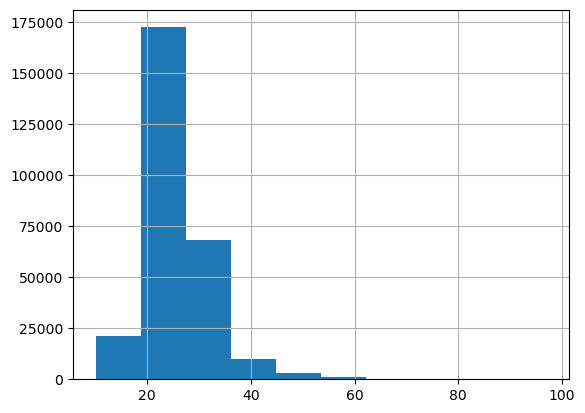

In [29]:
all_athlete_games["Age"].hist(bins = 10)
import matplotlib.pyplot as plt
plt.show()

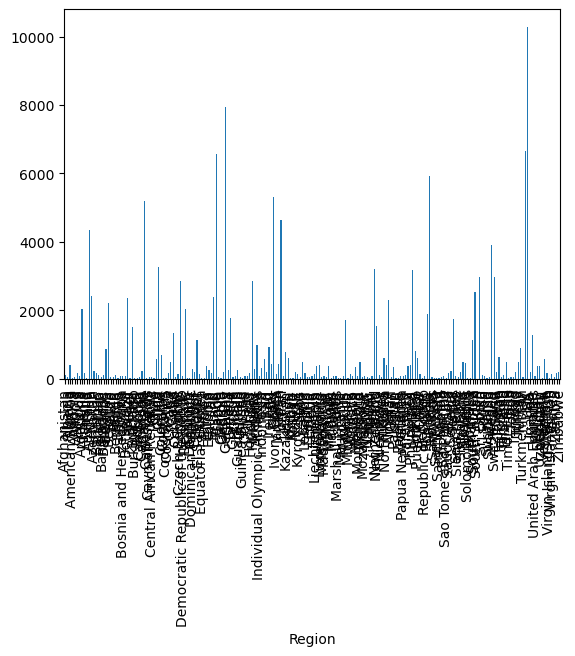

In [33]:
most_athletes_allregion.plot.bar()
plt.show()